<a href="https://colab.research.google.com/github/SardarAmmer/DataScience-Projects-/blob/main/DEN_Task2_(HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Exploring the Dataset
import pandas as pdd

df=pdd.read_csv("/content/zameen-updated.csv")
#check datatypes
print(df.dtypes)

#checking all columns name
print(df.columns)
#checking last rows
df.tail()
#check null values
print(df.isnull().sum())

# # filling null values of agedncy and agent
df['agency'] = df['agency'].fillna('undefined')
df['agent'] = df['agent'].fillna('undefined')
#again checking null values to make sure no null value remains
print(df.isnull().sum())
#get description of dataset
df.describe()





property_id        int64
location_id        int64
page_url          object
property_type     object
price              int64
location          object
city              object
province_name     object
latitude         float64
longitude        float64
baths              int64
area              object
purpose           object
bedrooms           int64
date_added        object
agency            object
agent             object
Area Type         object
Area Size        float64
Area Category     object
dtype: object
Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'area', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'Area Type', 'Area Size', 'Area Category'],
      dtype='object')
property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latit

,property_id,location_id,price,latitude,longitude,baths,bedrooms,Area Size
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,5.892188
std,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,5.778327
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,3.000000
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,5.000000
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,8.000000
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,800.000000


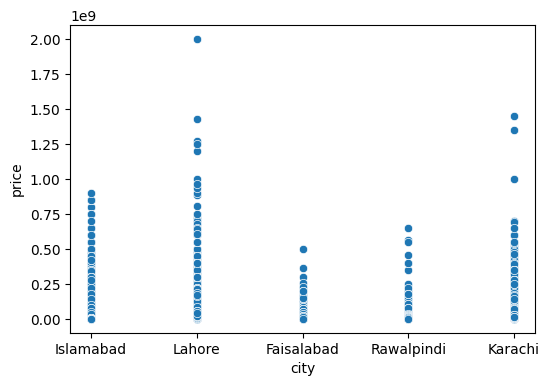

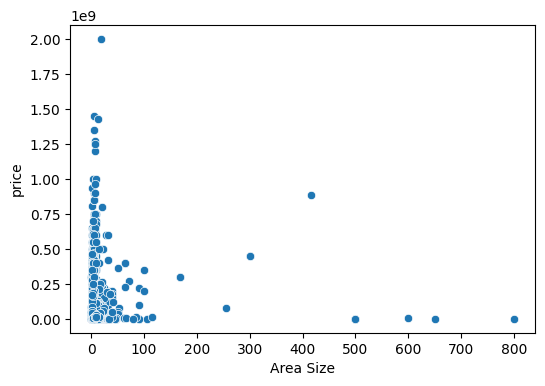

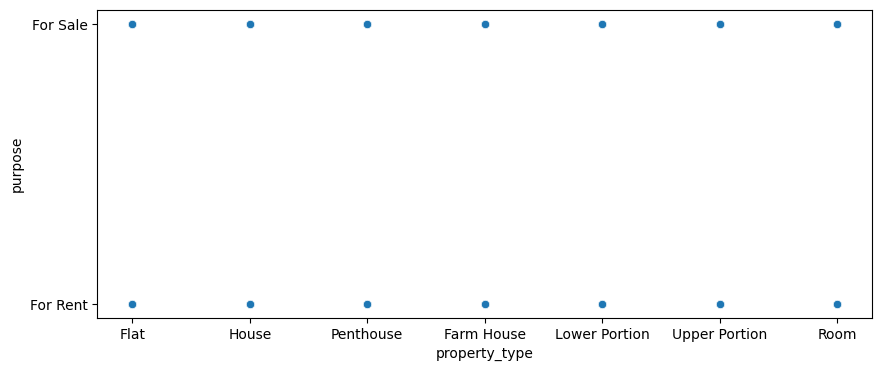

In [ ]:
# @title Validation & ploting  of Dataset
import pandas as pdd
import seaborn as sns
import matplotlib.pyplot as plt
df=pdd.read_csv("/content/zameen-updated.csv")

#removing extra spacing and lower and upercase sencitivity
categorical_columns = ['page_url', 'property_type', 'location', 'city', 'province_name', 'purpose']
for col in categorical_columns:
  df[col] = df[col].str.strip()
#filtering out the data out of boundries of pakistan latitude and longitutues
df = df[(df['latitude'].between(23.5, 37.0)) & (df['longitude'].between(60.9, 77.0))]

#validation bath and bedrooms
df = df[df['baths'] >= 0]
df = df[df['bedrooms'] >= 0]

#Scater ploting of Price and city
plt.figure(figsize=(6, 4))
sns.scatterplot(x='city', y='price', data=df)
plt.show()

#scaterplot of area size and price
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Area Size', y='price', data=df)
plt.show()
#scaterplot of property type and purpose
plt.figure(figsize=(10, 4))
sns.scatterplot(x='property_type', y='purpose', data=df)
plt.show()




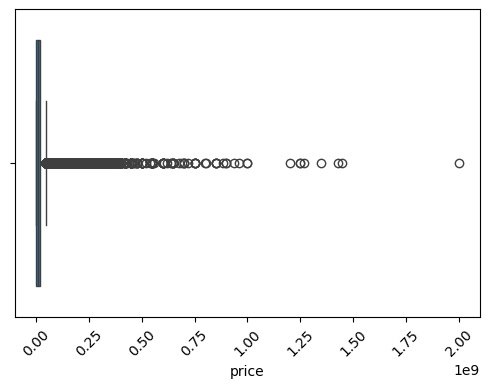

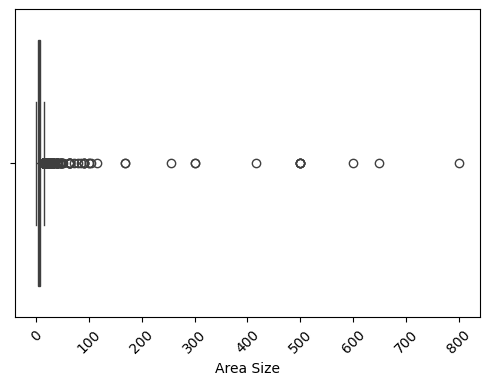

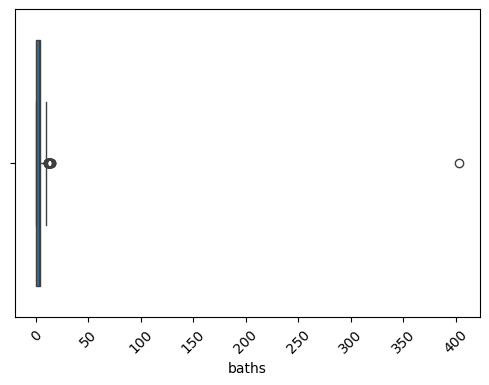

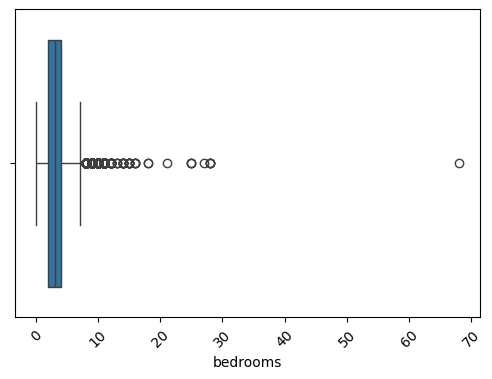

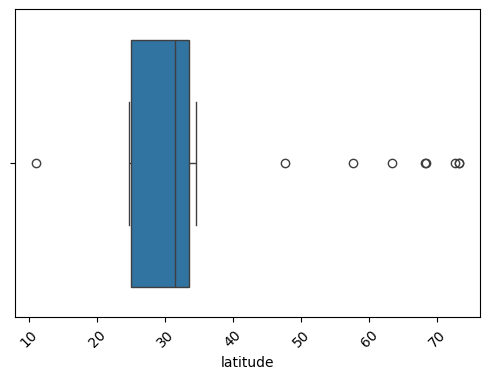

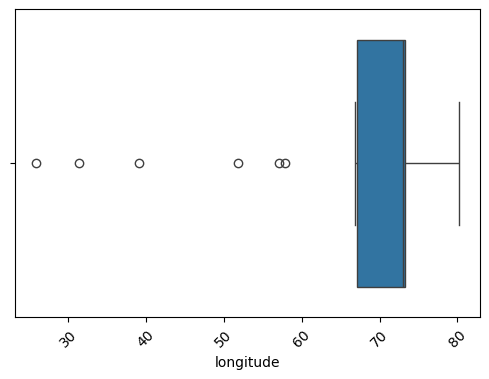

total_outliers in  price : 13547
total_outliers in  Area Size : 3326
total_outliers in  baths : 22
total_outliers in  bedrooms : 3319
total_outliers in  latitude : 9
total_outliers in  longitude : 6
outliers after handling them by median mathod 
total_outliers in  price : 0
total_outliers in  Area Size : 0
total_outliers in  baths : 0
total_outliers in  bedrooms : 0
total_outliers in  latitude : 0
total_outliers in  longitude : 0
After Removing Outliers 


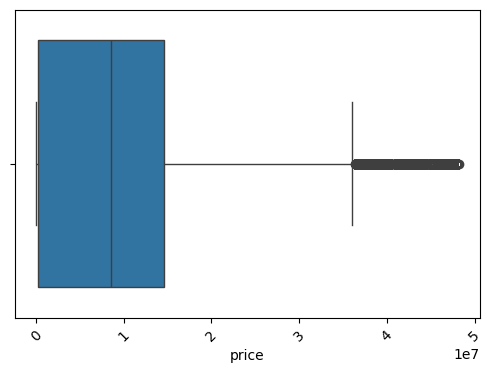

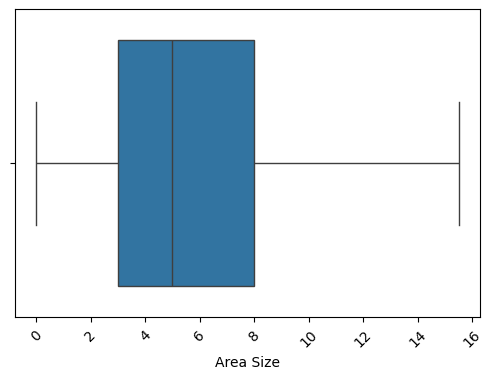

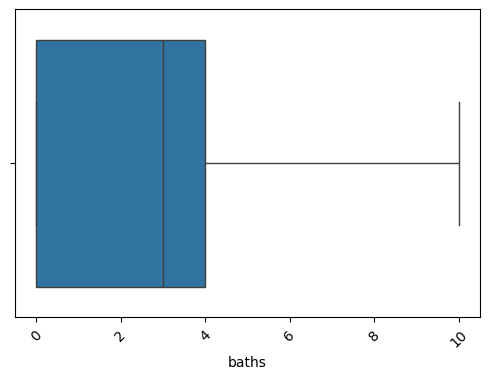

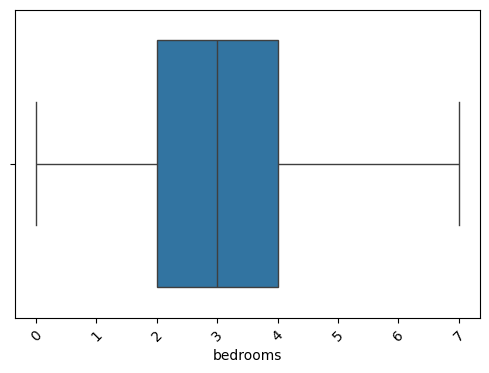

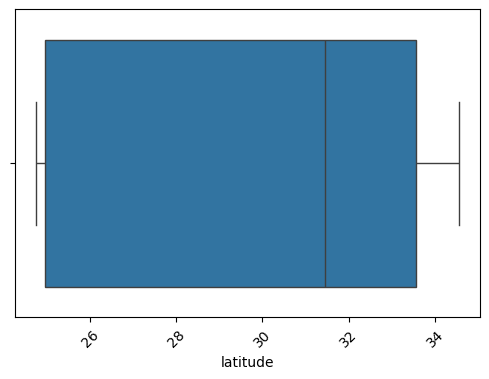

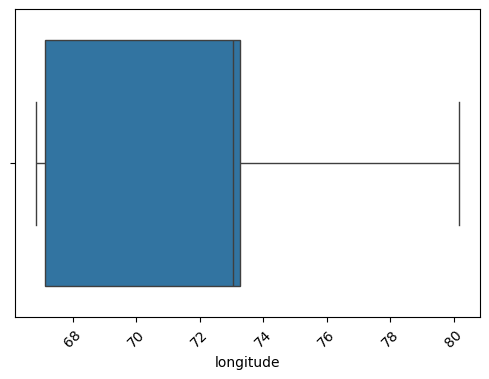

In [ ]:
# @title Outlier Detection & Handling
import pandas as pdd
import seaborn as sns
import matplotlib.pyplot as plt
df=pdd.read_csv("/content/zameen-updated.csv")

#check outliers in numeric columns
numeric_columns = ['price', 'Area Size', 'baths', 'bedrooms', 'latitude', 'longitude']
for col in numeric_columns:
  plt.figure(figsize=(6, 4))
  sns.boxplot(x=df[col])
  plt.xticks(rotation=45)
  plt.show()
#now showing the exact no of outliers in all numeric attributes
for col in numeric_columns:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  total_outliers = outliers.shape[0]
  print("total_outliers in ",col,":",total_outliers)
print("outliers after handling them by median mathod ")
  #now handling outliers by median in all numeric columns
for col in numeric_columns:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  median_value = df[col].median()
  df[col] = df[col].apply(lambda x: median_value if (x < lower_bound) or (x > upper_bound) else x)
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  total_outliers = outliers.shape[0]
  print("total_outliers in ",col,":",total_outliers)
print("After Removing Outliers ")
for col in numeric_columns:
  plt.figure(figsize=(6, 4))
  sns.boxplot(x=df[col])
  plt.xticks(rotation=45)
  plt.show()

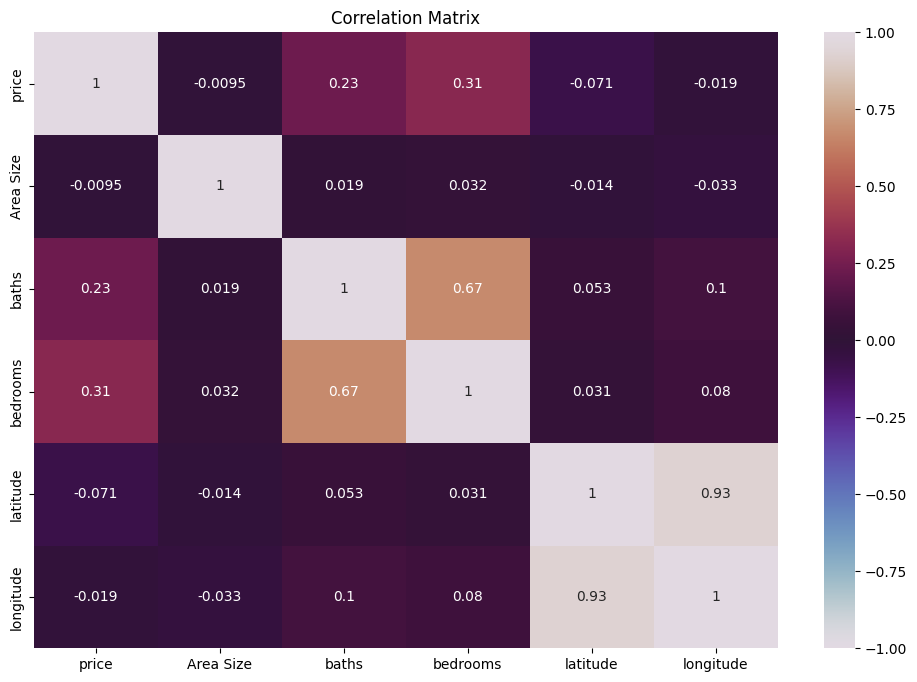

In [ ]:
# @title HeatMap & Correlation
import pandas as pdd
import seaborn as sns
import matplotlib.pyplot as plt
df=pdd.read_csv("/content/zameen-updated.csv")
numerical_columns = ['price', 'Area Size', 'baths', 'bedrooms', 'latitude', 'longitude']

plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='twilight', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


      price  Area Size  price_per_unit_area  bedrooms  is_luxury  \
0  10000000        4.0         2.500000e+06         2          0   
1   6900000        5.6         1.232143e+06         3          0   
2  16500000        8.0         2.062500e+06         5          0   
3  43500000        2.0         2.175000e+07         4          0   
4   7000000        8.0         8.750000e+05         3          0   

            full_location  
0         G-10, Islamabad  
1         E-11, Islamabad  
2         G-15, Islamabad  
3    Bani Gala, Islamabad  
4  DHA Defence, Islamabad  
Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'area', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'Area Type', 'Area Size', 'Area Category', 'price_per_unit_area',
       'is_luxury', 'full_location'],
      dtype='object')


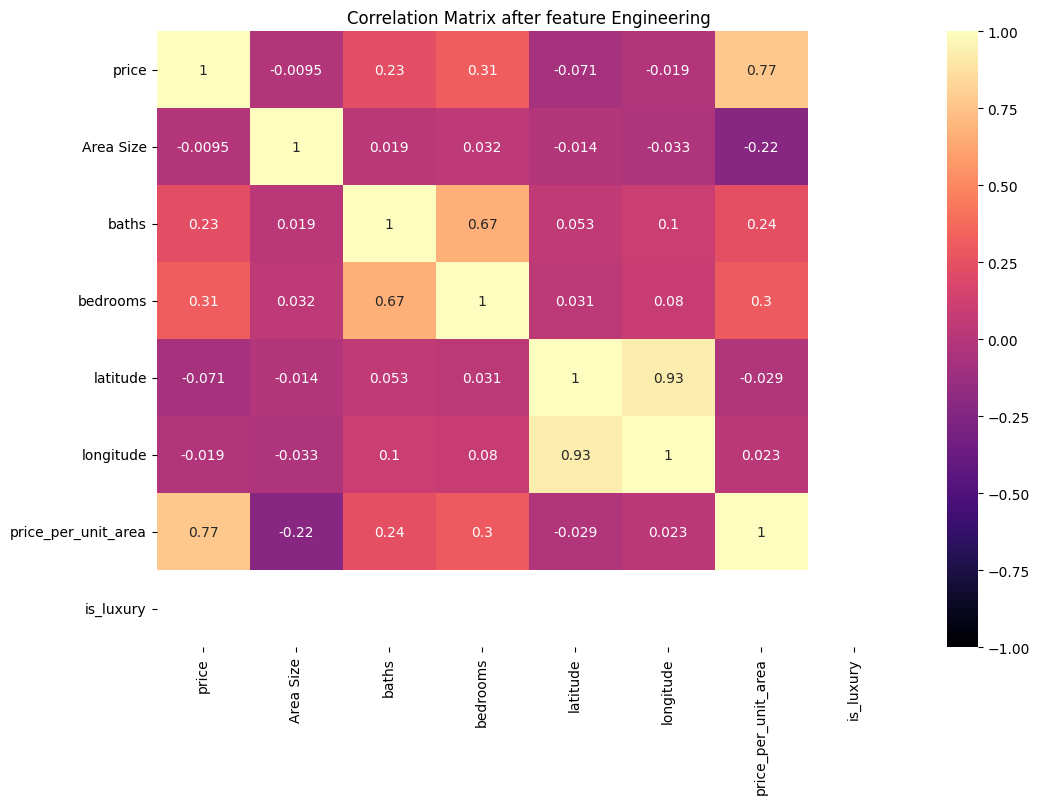

In [ ]:
# @title Feature Engineering
import pandas as pdd
df=pdd.read_csv("/content/zameen-updated.csv")


# Ensure Area Size is numeric
df['Area Size'] = pdd.to_numeric(df['Area Size'], errors='coerce')

# 1. Create price per unit area
df['price_per_unit_area'] = df['price'] / df['Area Size']

# 2. Create a binary feature for luxury properties
# Rule: Area > 500 and Bedrooms >= 5 → Luxury
df['is_luxury'] = ((df['Area Size'] > 500) & (df['bedrooms'] >= 5)).astype(int)

# Optional: 3. Create full location by combining location and city
df['full_location'] = df['location'].astype(str) + ', ' + df['city'].astype(str)

# View new features
print(df[['price', 'Area Size', 'price_per_unit_area', 'bedrooms', 'is_luxury', 'full_location']].head())

print(df.columns)
numerical_columns = ['price', 'Area Size', 'baths', 'bedrooms', 'latitude', 'longitude','price_per_unit_area',
                     'is_luxury']
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='magma', vmin=-1, vmax=1)
plt.title('Correlation Matrix after feature Engineering')
plt.show()



📊 Model Evaluation Results:
               Model          MAE           MSE         RMSE  R² Score
0  Linear Regression  15648406.21  1.026763e+15  32043147.19    0.1142
1      Random Forest   8066971.23  5.059381e+14  22493068.13    0.5635
2  Gradient Boosting  11497547.12  7.100100e+14  26646013.09    0.3875


Text(0.5, 1.0, 'Model Performance Comparison')

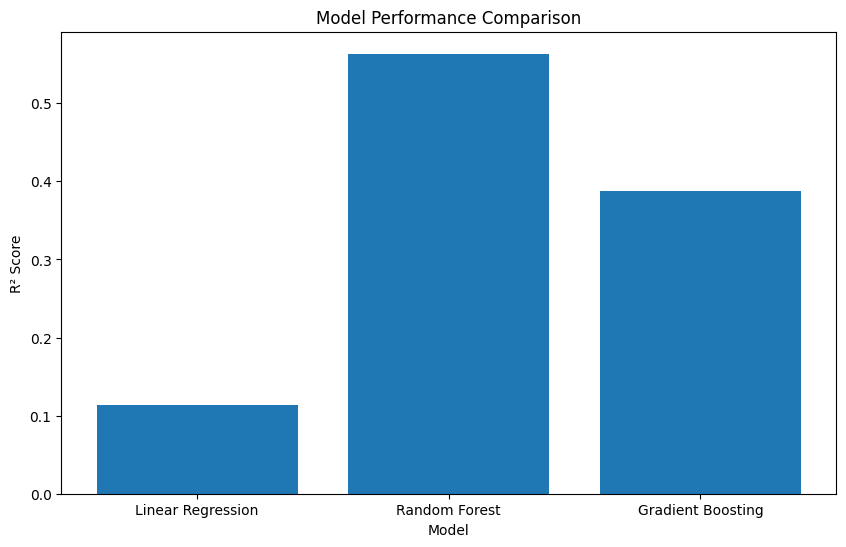

In [ ]:
# @title Models Training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

df=pdd.read_csv("/content/zameen-updated.csv")
features = ['Area Size', 'baths', 'bedrooms', 'latitude', 'longitude']
X = df[features]
y = df['price']
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initializing models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)

    results.append({
        "Model": name,
        "MAE": round(mae, 2),
        "MSE": round(mse, 2),
        "RMSE": round(rmse, 2),
        "R² Score": round(r2, 4)
    })

#Evaluation table
results_df = pd.DataFrame(results)
print("📊 Model Evaluation Results:")
print(results_df)

plt.figure(figsize=(10, 6))
plt.bar(results_df["Model"], results_df["R² Score"])
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.title("Model Performance Comparison")



📊 Actual vs Predicted House Prices:
   Actual Price  Predicted Price
0      87500000     7.556869e+07
1         55000     1.091688e+07
2      21800000     2.410545e+07
3       6500000     4.187800e+06
4         75000     9.938527e+06
5      22000000     2.761226e+07
6      37500000     3.753478e+07
7       5000000     6.271370e+06
8      12000000     4.288909e+06
9      29000000     2.950620e+07


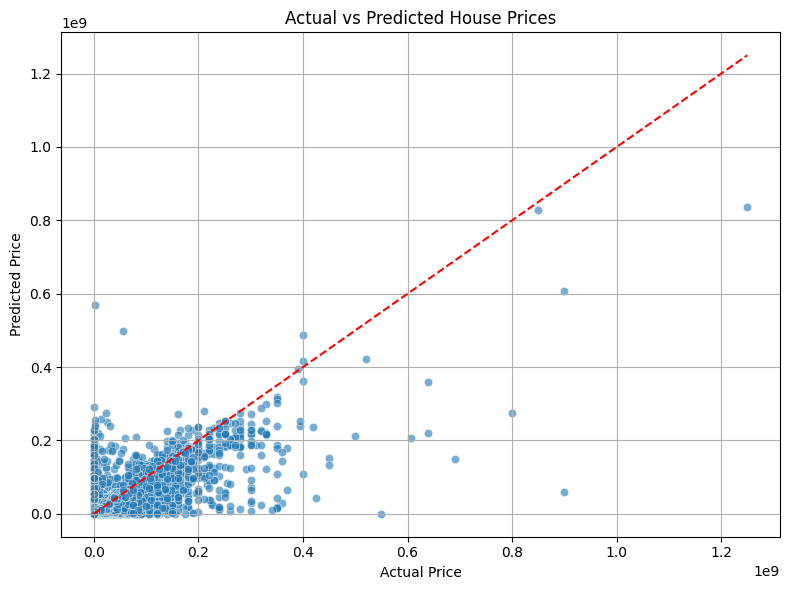

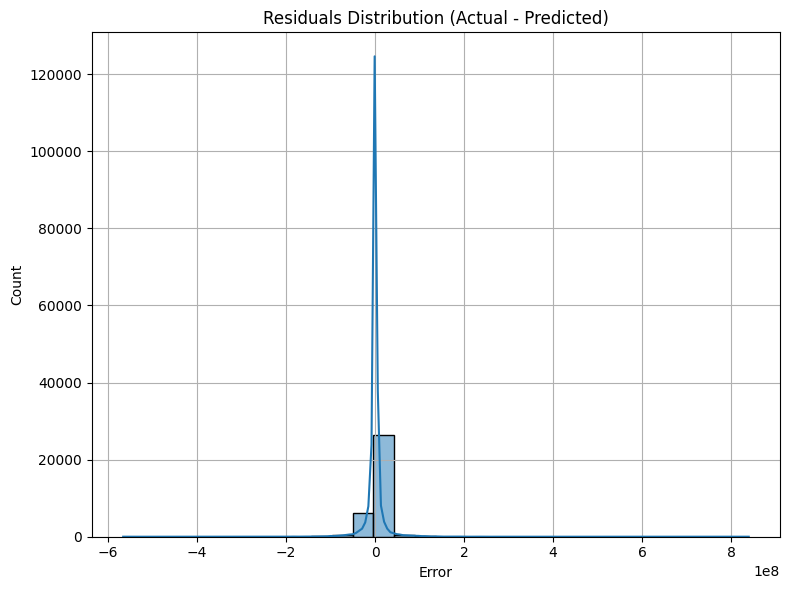


📌 Test Case Example:
Input Features: {'Area Size': 10.0, 'baths': 6.0, 'bedrooms': 5.0, 'latitude': 31.469558000000003, 'longitude': 74.28139}
Actual Price: 22000000
Predicted Price: 27612260.44


In [ ]:
# @title Testing Model Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pdd
df=pdd.read_csv("/content/zameen-updated.csv")

# Choose the best model — replace gb_model with the one you prefer
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
preds = model.predict(X_test)

# 1. Show Actual vs Predicted values in table
comparison_df = pdd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': preds
})

print("\n📊 Actual vs Predicted House Prices:")
print(comparison_df.head(10))  # Show first 10 examples

# 2. Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=preds, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Residuals Plot
residuals = y_test - preds
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Distribution (Actual - Predicted)")
plt.xlabel("Error")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Single Test Case Example
index = 5  # Change index to test other cases
print("\n📌 Test Case Example:")
print("Input Features:", X_test.iloc[index].to_dict())
print("Actual Price:", y_test.iloc[index])
print("Predicted Price:", round(preds[index], 2))




📊 Actual vs Predicted House Prices:
   Actual Price  Predicted Price
0      87500000     3.729614e+07
1         55000     1.933378e+07
2      21800000     2.583496e+07
3       6500000     1.578411e+07
4         75000     3.286170e+07
5      22000000     3.131163e+07
6      37500000     3.365413e+07
7       5000000     2.022554e+07
8      12000000     1.432816e+07
9      29000000     2.446449e+06


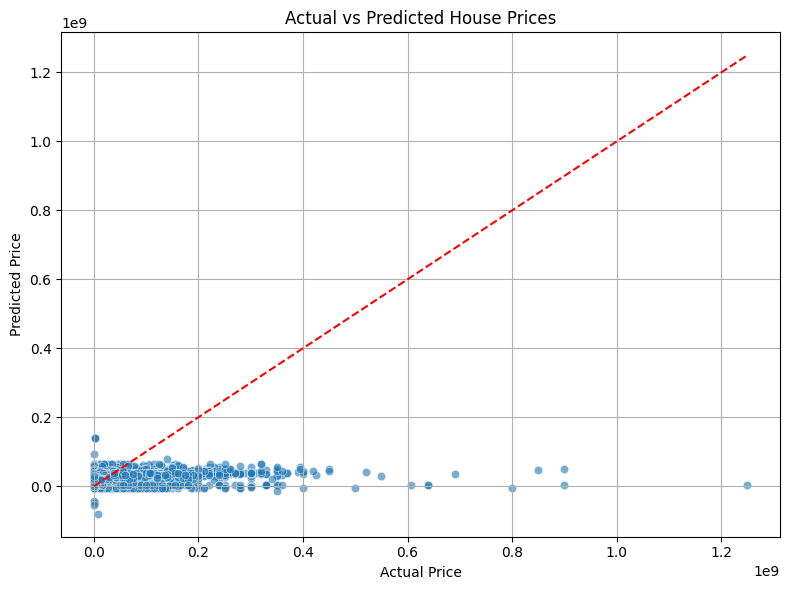

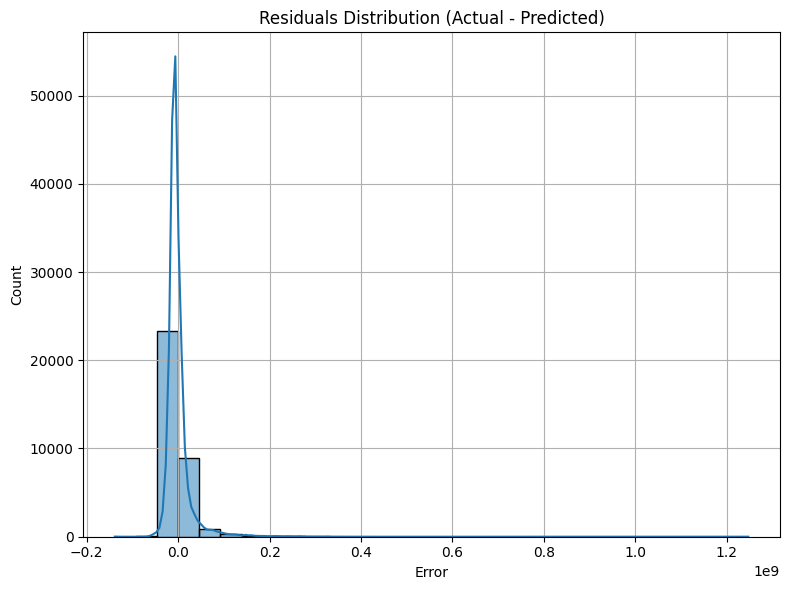


📌 Test Case Example:
Input Features: {'Area Size': 10.0, 'baths': 6.0, 'bedrooms': 5.0, 'latitude': 31.469558000000003, 'longitude': 74.28139}
Actual Price: 22000000
Predicted Price: 31311626.92


In [ ]:
# @title Testing Model Linear Regression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pdd
df=pdd.read_csv("/content/zameen-updated.csv")

# Choose the best model — replace gb_model with the one you prefer
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
preds = model.predict(X_test)

# 1. Show Actual vs Predicted values in table
comparison_df = pdd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': preds
})

print("\n📊 Actual vs Predicted House Prices:")
print(comparison_df.head(10))  # Show first 10 examples

# 2. Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=preds, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Residuals Plot
residuals = y_test - preds
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Distribution (Actual - Predicted)")
plt.xlabel("Error")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Single Test Case Example
index = 5  # Change index to test other cases
print("\n📌 Test Case Example:")
print("Input Features:", X_test.iloc[index].to_dict())
print("Actual Price:", y_test.iloc[index])
print("Predicted Price:", round(preds[index], 2))





📊 Actual vs Predicted House Prices:
   Actual Price  Predicted Price
0      87500000     8.847917e+07
1         55000     1.267524e+07
2      21800000     2.282208e+07
3       6500000     1.484694e+07
4         75000     2.884535e+07
5      22000000     2.231562e+07
6      37500000     2.775671e+07
7       5000000     6.997928e+06
8      12000000     8.719710e+06
9      29000000     1.697264e+07


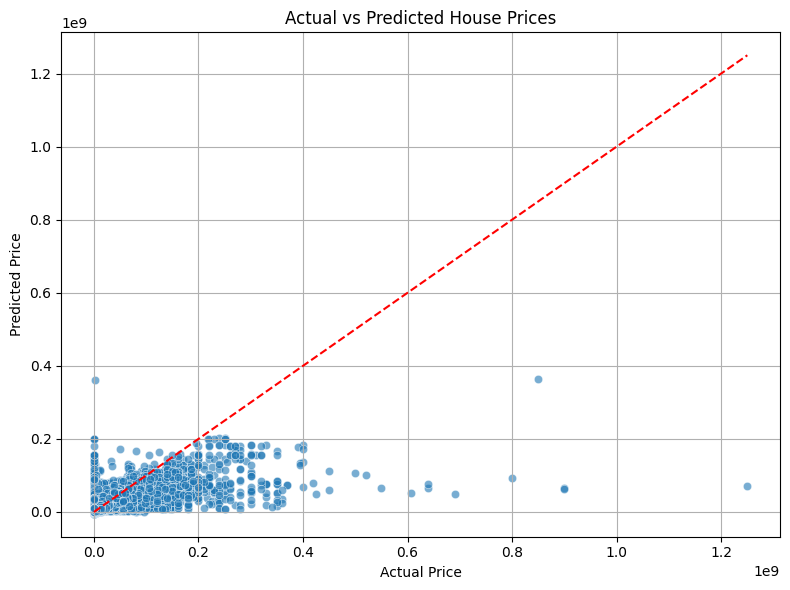

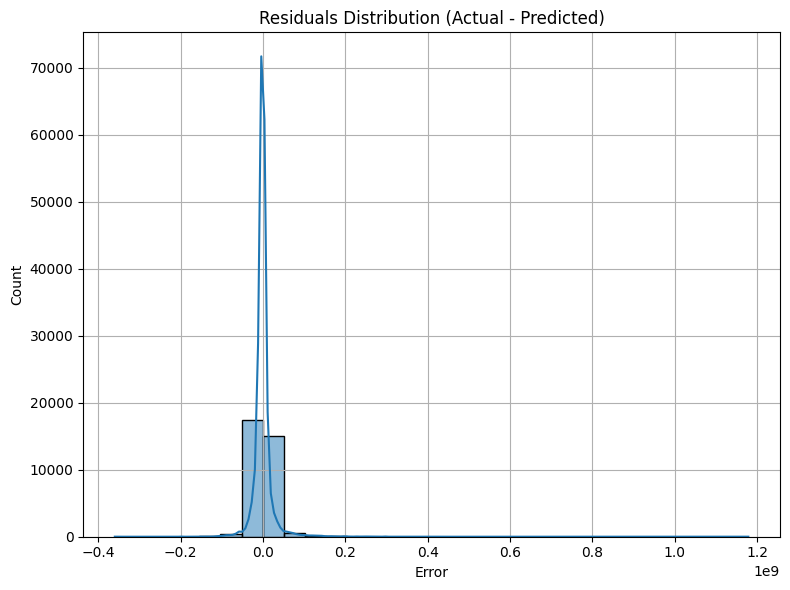


📌 Test Case Example:
Input Features: {'Area Size': 10.0, 'baths': 6.0, 'bedrooms': 5.0, 'latitude': 31.469558000000003, 'longitude': 74.28139}
Actual Price: 22000000
Predicted Price: 22315622.8


In [ ]:
# @title Testing Model GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pdd
df=pdd.read_csv("/content/zameen-updated.csv")

# Choose the best model — replace gb_model with the one you prefer
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
preds = model.predict(X_test)

# 1. Show Actual vs Predicted values in table
comparison_df = pdd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': preds
})

print("\n📊 Actual vs Predicted House Prices:")
print(comparison_df.head(10))  # Show first 10 examples

# 2. Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=preds, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Residuals Plot
residuals = y_test - preds
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Distribution (Actual - Predicted)")
plt.xlabel("Error")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Single Test Case Example
index = 5  # Change index to test other cases
print("\n📌 Test Case Example:")
print("Input Features:", X_test.iloc[index].to_dict())
print("Actual Price:", y_test.iloc[index])
print("Predicted Price:", round(preds[index], 2))


